In [3]:
import numpy as np
import gzip
import pickle
import collections
import sklearn.datasets

import matplotlib.pyplot as plt
%matplotlib inline

# TP : Modele linéaire

L'objectif de TP est d'implémenter deux modèles linéaires:

- le cas binaire
- le cas multiclasse

Pour l'entrainement, nous implémenterons différentes variantes :

- Mise à jour en utilisant un seul point de données et en utilisant un minibatch de taille >1
- Fonction de perte : hinge loss, negative log-likelihood
- Régularization des paramêtres : régularization L1 et L2

## Descente de gradient stochastique

Soit $D = \{\langle x^{(i)}, y^{(i)} \rangle \}_{i=1}^n$ les données dentrainement.
Nous pouvons écrire l'objectif d'entrainement de la façon suivante:
$$
\min_{a, b} \frac{1}{n} \sum_i \ell(y^{(i)}, \langle a, x^{(i)} \rangle + b) + \beta r(a)
$$
où a et b sont les paramêtres du modèle, $\ell$ la perte associé et $r(a)$ un terme de régularization sur $a$ paramétré par $\beta \geq 0$.

On peut optimiser cette objectif par descente de gradient en calculant une séquence de paramêtres de la façon suivante :
$$
a^{(t + 1)}
= a^{(t)} - \epsilon \nabla_a (\frac{1}{n} \sum_{i=1}^n \ell(y^{(i)}, \langle a, x^{(i)} \rangle + b) + \beta r(a))
= a^{(t)} - \epsilon \nabla_a \frac{1}{n} \sum_{i=1}^n \ell(y^{(i)}, \langle a, x^{(i)} \rangle + b) - \epsilon \nabla_a \beta r(a)
$$
et de la même façon pour $b$.

On peut interpréter le gradient de la fonction de perte comme l'espérence du gradient sur les données d'entrainement. L'idée derrière la descente de gradient stochastique et d'approximer ce terme en utilisant uniquement un sous ensemble des points de données.

Soit $\mathrm I(t) \subseteq \{1...n\}$ le sous ensemble de points à utiliser pour la mise à jour $t$, on peut ré-écrire la mise à jour des paramêtres de la façon suivante :
$$
a^{(t + 1)}
= a^{(t)} - \epsilon \nabla_a \frac{1}{|\mathrm I(t)|} \sum_{i \in I(t)} \ell(y^{(i)}, \langle a, x^{(i)} \rangle + b) - \epsilon \nabla_a \beta r(a)
$$
L'ensemble $\mathrm I(t)$ est appelé un minibatch.

Dans le TP, vous utiliserez d'abord des minibatch de taille 1. C'est à dire qu'on met à jour les paramêtres en ne regardant qu'un seul point des données. On a alors deux boucles pendant l'entrainement :

- une boucle sur les epochs, une epoch est un passage sur les données
- une boucle sur les données, à chaque epoch on visite chaque point exactement une fois

## Roadmap

- Dans un premier temps, implémentez l'ensemble du TP avec une boucle d'entrainement qui ne regarde qu'un exemple à la fois (batch_size = 1). Seulement une fois que tout marche, modifiez votre code pouvoir avoir des minibatch de taille >1
- Si vous avez le temps, vous pouvez également implémentez d'autres fonctions de pertes: squared hinge loss, exponential loss (cas binaire uniquement)

## Classification binaire

Nous commençons par la classification binaire. Les labels sont 0 et 1.
Nous avons dont les loss suivantes :

- Hinge loss: $\max(0, 1 - (2y - 1) (\langle a, x\rangle + b))$
- NLL loss: $- y (\langle a, x\rangle + b) + \log(1 + \exp(\langle a, x\rangle + b))$

Avant de commencer, dérivez à la main les gradients !

In [27]:
# création des données

n_train = 400
n_dev = 100
n_test = 100

X, Y = sklearn.datasets.make_classification(
    n_samples=n_train + n_dev + n_test,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    class_sep=2.5
)

# split dataset
X_train = X[:n_train]
Y_train = Y[:n_train]
X_dev = X[n_train:n_train+n_dev]
Y_dev = Y[n_train:n_train+n_dev]
X_test = X[n_train+n_dev:]
Y_test = Y[n_train+n_dev:]

print(len(Y_train), len(Y_dev), len(Y_test))

400 100 100


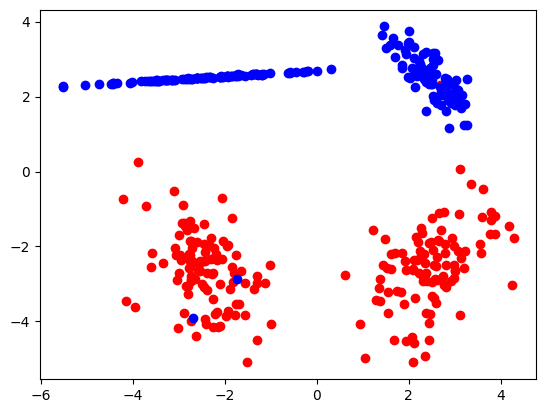

In [28]:
# Affiche les données d'entrainement
plt.scatter(X_train[Y_train == 0, 0], X_train[Y_train == 0, 1], c="red")
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], c="blue")

In [29]:
v = np.random.normal(0,1,4)
print(v)
v2 = np.zeros_like(v)
print(v2)

[-0.74528712 -1.78272105 -0.49990484  1.3341708 ]
[0. 0. 0. 0.]


Nous allons créer une classe qui contient toutes les fonctions dont nous avons besoin.

- Implémentez les méthodes dans l'ordre, mais je conseille de ne pas directement compléter le code : tester d'abord en prototypant rapidement, et une fois qu'une fonction a l'air de marcher, vous l'incluez dans le code de la classe et passez à la fonction suivante 
- Pour la fonction pred_batch, ne faite pas de boucle!
- Quand vous prototypez, pensez bien à la question des dimensions, affichez les dimensions de vos tenseurs entre les opérations, etc.
- Pour la fonction fit, écrivez d'abord l'entrainement qui enregistre simplement les paramêtres de la dernières epoch. Une fois que ça marche, modifiez pour enregistrer les paramêtres qui ont obtenus les meilleurs résultats sur le dev

In [30]:
def sigmoid(u):
    return np.exp(u) / (1 + np.exp(u))

class BinaryLinearClassifier:
    def __init__(self, feature_size):
        self.feature_size = feature_size
        
        self.a = np.random.normal(0, 1, feature_size)
        self.b = 0
        
    # predicting the output for a single datapoint
    def pred(self, x):
        if len(x.shape) != 1:
            raise RuntimeError("1D tensor expected!")
            
        # TODO: compute and return the prediction
        # TODO TODO
        raise NotImplementedError()
    
    # predict the outout for a batch of datapoints
    # shape of input X: (n datapoints, feature_size)
    # shape of output Y: (n datapoints, )
    def pred_batch(self, X):
        if len(X.shape) != 2 or X.shape[1] != self.feature_size:
            raise RuntimeError("Invalid input shape")
        raise NotImplementedError()
    
    # compute the accuracy of the model
    # shape of input X: (n datapoints, feature_size)
    # shape of input Y_gold: (n datapoints,)
    # output type: scalar
    def accuracy(self, X, Y_gold):
        # TODO
        raise NotImplementedError()
        
    # Entraine le modèle en utilisant les données en entrée
    # Attention:
    # - il faut commencez par réinitialiser les données!
    # - retournez dans acc l'accuracy du modèle à chaque époch: qu'observez vous?
    def fit(
        self,
        X_train,
        Y_train,
        X_dev,
        Y_dev,
        loss_type="hinge",
        reg="l2",
        reg_weight=0,  # beta
        n_epoch=10,
        stepsize=1e-3,
        minibatch_size=1
    ):
        assert minibatch_size >= 1
        assert reg_weight >= 0
        
        # on commence par le cas cas simple.
        # une fois que vous avez réussi à faire marcher le modèle,
        # modifiez le code pour qu'il fonctionne avec n'importe quelle taille de minibatch
        assert minibatch_size == 1
        
        dev_accuracy = list()
        
        self.a = np.random.normal(0, 1, self.feature_size)
        self.b = 0
        
        # boucle sur les epochs
        for _ in range(n_epoch):
            # boucle sur les données
            # on commence ici par le cas où on regarde les données une par une
            # une fois que ça marche, modifier le code pour faire des minibatch
            # de taille minibatch_size (donnée en argument)
            for i in range(X_train.shape[0]):
                x = X_train[i]
                y = Y_train[i]
                
                # acucmulé les gradients dans ces deux variables
                grad_a = np
                grad_b = 0
                if loss_type == "hinge":
                    raise NotImplemented()
                elif loss_type == "nll":
                    raise NotImplemented()
                else:
                    raise NotImplemented()
                    
                if reg_weight > 0:
                    if reg == "l2":
                        raise NotImplemented()
                    else:
                        raise NotImplemented()
                        
                # TODO: mettre à jour les paramêtres self.a et self.b
                raise NotImplemented()
                
            dev_accuracy.append(self.accuracy(X_dev, Y_dev))
        
        return dev_accuracy

In [31]:
# TODO: tester le modèle!

binary_classifier = BinaryLinearClassifier(X_train.shape[1])
dev_accuracy = binary_classifier.fit(
    X_train,
    Y_train,
    X_dev,
    Y_dev,
    loss_type="hinge",
    stepsize=1e-3
)
# accuracy sur le dev à chaque époch
print(dev_accuracy)

[0.43, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Une fois que vous avez réussi à faire marcher le code, vous pouvez essayer de calculer le gradient sur des minibatch > 1

In [16]:
n_datapoints = 30
batch_size = 10

for epoch in range(3):
    print("Epoch: ", epoch)
    indices = np.random.permutation(n_datapoints)
    for first_id in range(0, n_datapoints, batch_size):
        batch_indices = indices[first_id : first_id + batch_size]
        print("Batch: ", batch_indices)
        # you can retrieve the batch data via:
        # X[batch_indices] and Y[batch_indices]
    print()

Epoch:  0
Batch:  [24 17 15  2  9  4 20  7 25 18]
Batch:  [27 14  3 22  1  5 26 11  0  6]
Batch:  [13 28 23 19 12  8 29 21 10 16]

Epoch:  1
Batch:  [13 11  2  3 12 14 24 20 21 25]
Batch:  [ 5 29  9 22 16 19 18  8 15 10]
Batch:  [ 6  1 26 27 28 17 23  4  7  0]

Epoch:  2
Batch:  [16 21  5 29 23  1 22 19 13 17]
Batch:  [27 10 11 25  7  3 15 12  2  0]
Batch:  [14  8 18  6 20 28  9 26  4 24]



## Classification multiclasse

On va maintenant développer un classificateur multiclasse, c'est-à-dire qu'on doit prédire une classe parmi k.
On va générer encore une fois des données artificielles. Vous pouvez modifier la valeur de class_sep dans la génération pour rendre le problème plus facile.

In [17]:
# génération des données pour le perceptron multiclasse
n_train = 400
n_dev = 100
n_test = 100

X, Y = sklearn.datasets.make_classification(
    n_samples=n_train + n_dev + n_test,
    n_features=10,
    n_informative=9,
    n_redundant=0,
    n_classes=5,
    # to make the problem easier,
    # you can change the value here to 2 or even higher value
    class_sep=1.5
)

# split dataset
X_train = X[:n_train]
Y_train = Y[:n_train]
X_dev = X[n_train:n_train+n_dev]
Y_dev = Y[n_train:n_train+n_dev]
X_test = X[n_train+n_dev:]
Y_test = Y[n_train+n_dev:]

len(Y_train), len(Y_dev), len(Y_test)

(400, 100, 100)

Et le code!

Faite bien attention aux dimensions ! N'oubliez pas d'utiliser le broadcasting.

In [18]:
A = np.random.rand(2, 4)
B = np.random.rand(10, 4)
C = A[None, :, :] @ B[:, :, None]
print(C.shape)
C = C.squeeze(2)
print(C.shape)

(10, 2, 1)
(10, 2)


In [ ]:
class MulticlassLinearModel:
    def __init__(self, n_classes, feature_size):
        # TODO TODO
        
    def pred(self, x):
        if len(x.shape) != 1:
            raise RuntimeError()
            
        # TODO TODO
        
        return pred
    
    def pred_batch(self, X):
        # TODO TODO
        
        return pred
    
    def accuracy(self, X, Y):
        # TODO TODO
        
        return acc
        
    def fit(self, X_train, Y_train, X_dev, Y_dev, n_epoch=100):
        accs = list()
        
        # TODO TODO
        
        return accs

In [ ]:
# TODO: tester le modèle